In [25]:
import os, sys
sys.path.append('C:\\Users\\alicj\\Documents\\GitHub\\RGCPD')
os.chdir('C:\\Users\\alicj\\Documents\\GitHub\\RGCPD')
from RGCPD import RGCPD, class_BivariateMI, functions_pp, BivariateMI, core_pp
from RGCPD.forecasting import stat_models_cont
from RGCPD.forecasting import func_models as fc_utils
from RGCPD.pipeline import pipeline
from RGCPD.pipeline.prediction import pred

from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV
from pipeline.data_preparations import coordinates, data_steps, mean, xarray, month, data_prep
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

# main directory is the directory of this notebook
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) 

# my main directory (which contains folders with data etc)
my_main_dir = 'C:\\Users\\alicj\\Desktop\\WORK'
data_path = os.path.join(my_main_dir, 'data')
district_data_path = os.path.join(data_path, 'district')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

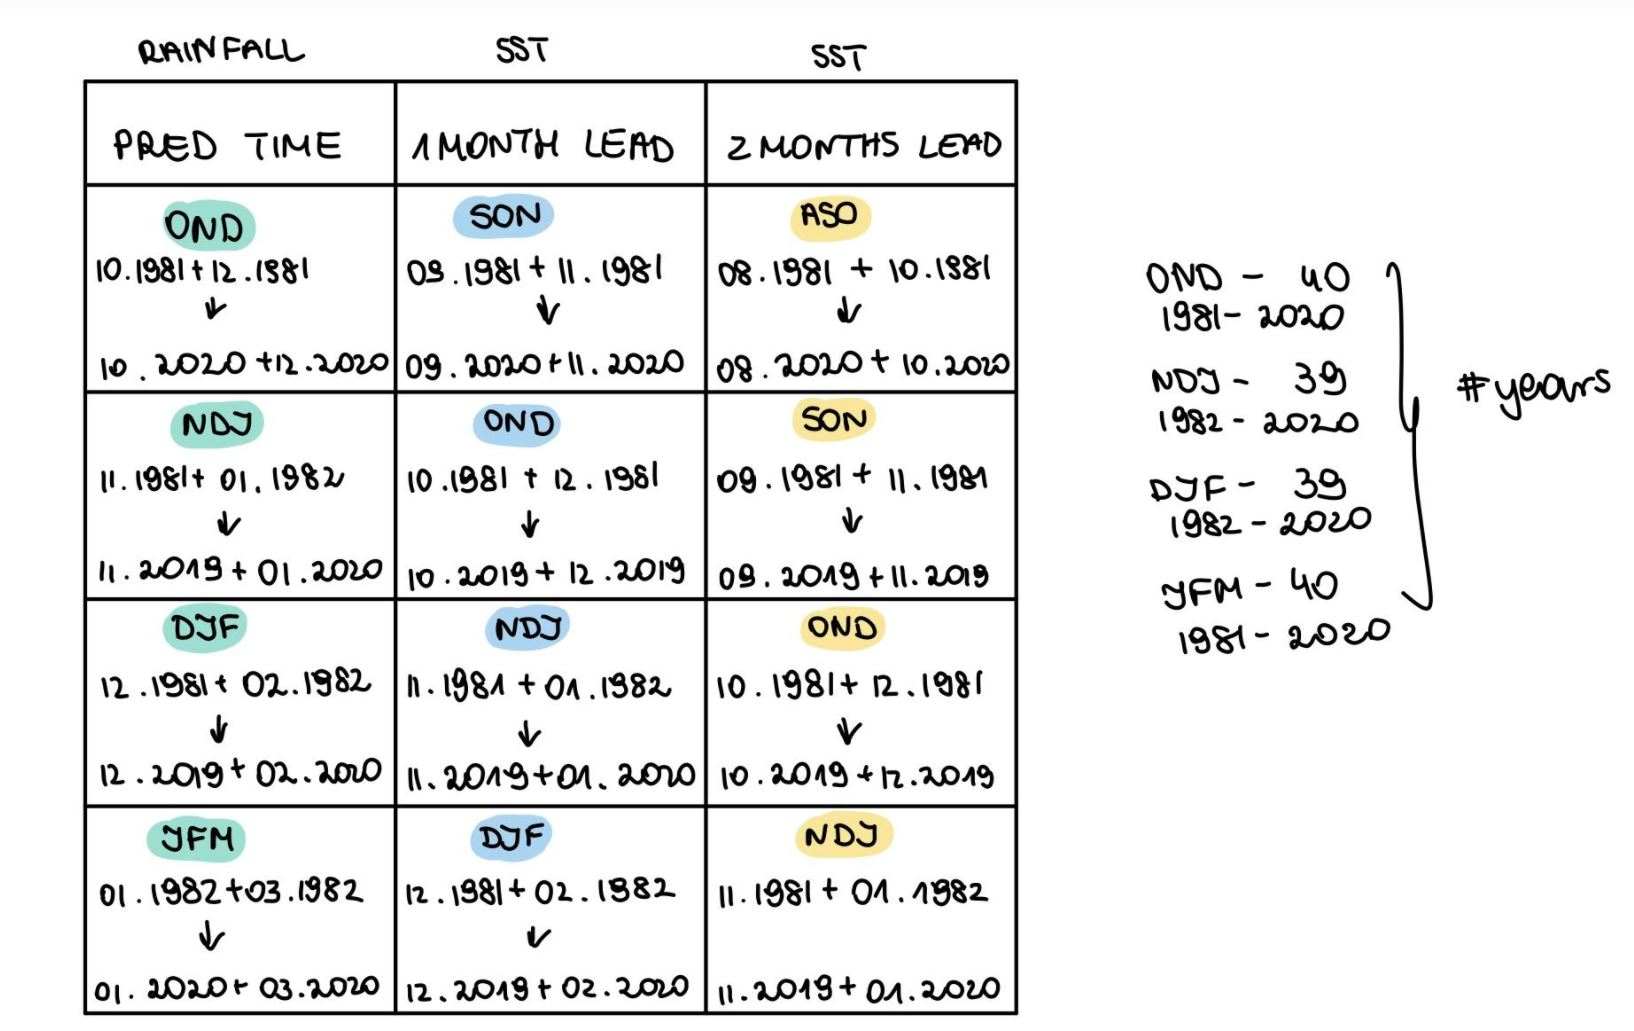

In [3]:
from IPython.display import Image
Image(filename = os.path.join(data_path, 'time.jpg'), width = 700, height = 400)

## define parameters 

In [4]:
function = class_BivariateMI.corr_map
alpha = 0.01
FDR_control = True 
distance_eps = 500
min_area_in_degrees2 = 5
tfreq = None

TVdates_aggr = False
ext_annual_to_mon = False 
#method = 'leave_1'
method = 'random_10'
detrend = True
labels = True
pred_type = 'continuous'
name = 'rainfall'

# choose type prediciton (continuous or probabilistic) by making comment #
#prediction = 'continuous'   
prediction = 'events'

### Depending on the drought severity, comment out one threshold

In [5]:
#q = 0.33 # lowest tercile
q = 0.15 # lowest 15 percent

# OND

In [6]:
# directory of target variable data
TV_path = os.path.join(district_data_path, 'changara_ond.nc')

# directory of precursor data
prec_path = os.path.join(data_path,'sst_1950-2020_1_12_monthly_1.0deg.nc')

# directory for test data 
path_test = os.path.join(my_main_dir, 'test')

# directory for output
output_path = os.path.join(my_main_dir, 'out')

list_of_name_path = [(1, TV_path), ('sst', prec_path)]

In [7]:
core_pp.import_ds_lazy(TV_path)

<xarray.DataArray 'rainfall' (time: 40)>
array([173., 145., 144., 238., 298., 197., 188., 142., 345., 136., 130., 170.,
       167., 183., 274., 190., 247., 320., 118., 213., 293., 144., 118., 328.,
       314., 196., 347., 145., 194., 202., 194., 182., 147., 251., 129., 222.,
       166., 210., 137., 250.])
Coordinates:
  * time     (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2020-12-01

## 1 month lead time (SON)

In [8]:
start_end_year = (1981, 2020)
start_end_TVyear = (1981, 2020)

lags = np.array([['09-01', '11-01']])            
periodnames = ['SON']                                         
start_end_TVdate = ('10-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('09-01', '11-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(36dp, 90%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag SON
Plotting Corr maps sst_labels_init, split 0, lag SON

Getting MI timeseries
There are [2, 2, 2, 2, 2, 2, 2, 2, 2, 2] regions in total (list of different splits)


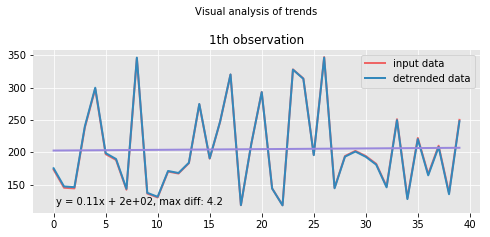

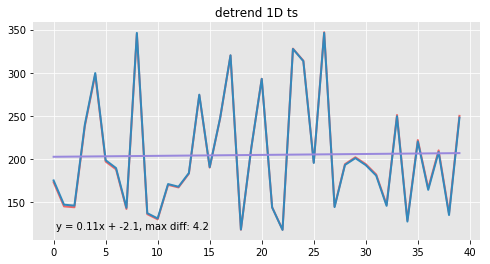

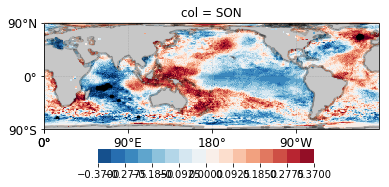

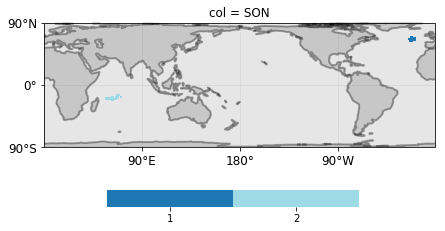

In [9]:
rg_changara_ond1 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)


In [16]:
print(rg_changara_ond1.start_end_year)

(1981, 2020)


In [11]:
rg_changara_ond1.auc, rg_changara_ond1.bss = pred(rg_changara_ond1, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.04
 AUC 0.41 
Train score
 BSS 0.04
 AUC 0.72


In [13]:
rg_changara_ond1.bss

-0.039134202763692484

In [10]:
auc_rg_changara_ond1, bss_rg_changara_ond1 = pred(rg_changara_ond1, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.04
 AUC 0.41 
Train score
 BSS 0.04
 AUC 0.72


In [21]:
predict = rg_changara_ond1.pred_tuple[0] ### dataframe with date, train is true mask 
predict.head()

RV1rainfall         0
0 1981-12-01            0  0.176094
  1982-12-01            0  0.257012
  1983-12-01            0  0.163018
  1984-12-01            0  0.125093
  1985-12-01            0  0.114161

In [25]:
rg_changara_ond1.pred_tuple[1]

Coefficients          0
0 SON..1..sst -0.069130
  SON..2..sst  0.230157
1 SON..1..sst -0.102197
  SON..2..sst  0.244093
2 SON..1..sst -0.134654
  SON..2..sst  0.219753
3 SON..1..sst -0.110992
  SON..2..sst  0.266694
4 SON..1..sst -0.001903
  SON..2..sst  0.003122
5 SON..1..sst -0.001337
  SON..2..sst  0.002493
6 SON..1..sst -0.048344
  SON..2..sst  0.307460
7 SON..1..sst -0.001503
  SON..2..sst  0.002434
8 SON..1..sst -0.119362
  SON..2..sst  0.204359
9 SON..1..sst -0.167312
  SON..2..sst  0.271895

In [28]:
rg_changara_ond1.pred_tuple[2]

{'lag_0': {'split_0': GridSearchCV(cv=PredefinedSplit(test_fold=array([5, 7, 3, 6, 4, 6, 8, 3, 0, 1, 8, 7, 7, 1, 0, 8, 2, 2, 6, 5, 4, 2,
         9, 0, 5, 0, 5, 9, 9, 3, 1, 2, 4, 3, 4, 1])),
               estimator=LogisticRegression(),
               param_grid={'C': [0.001, 0.1, 1, 5, 10, 20, 30]},
               return_train_score=True, scoring='neg_brier_score'),
  'split_1': GridSearchCV(cv=PredefinedSplit(test_fold=array([8, 0, 6, 7, 7, 6, 6, 5, 3, 3, 1, 8, 5, 4, 7, 1, 0, 8, 5, 1, 4, 2,
         9, 0, 5, 0, 4, 9, 9, 2, 2, 4, 3, 3, 1, 2])),
               estimator=LogisticRegression(),
               param_grid={'C': [0.001, 0.1, 1, 5, 10, 20, 30]},
               return_train_score=True, scoring='neg_brier_score'),
  'split_2': GridSearchCV(cv=PredefinedSplit(test_fold=array([5, 7, 3, 6, 4, 6, 8, 1, 8, 3, 0, 7, 7, 1, 0, 8, 2, 2, 6, 4, 5, 2,
         9, 0, 5, 0, 5, 9, 9, 3, 1, 2, 4, 3, 4, 1])),
               estimator=LogisticRegression(),
               param_grid={'C': [0.001

Text(0.5,0.98,'Severely dry events in Changara')

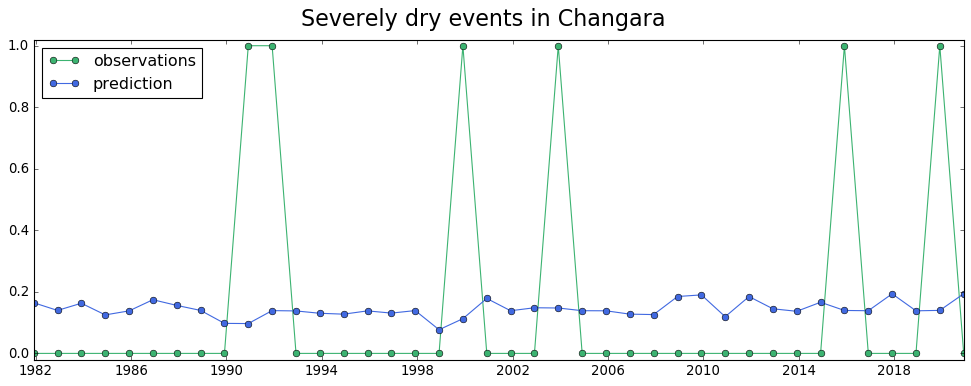

In [47]:
pred_tuple = rg_changara_ond1.pred_tuple
predict = pred_tuple[0]
predict_oos = functions_pp.get_df_test(predict, df_splits=rg_changara_ond1.df_splits) # Returns test data (only the data at which TrainIsTrue==False)
#plt.rcParams['']
plt.style.use('classic')
#plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, figsize=(15,5))
fig.patch.set_facecolor('xkcd:white')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,0], linestyle='solid', color='mediumseagreen', label='observations')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,1], linestyle='solid', color='royalblue', label='prediction')
ax.legend(loc = 2)
ax.set_ylim(-0.02, 1.02)
fig.suptitle('Severely dry events in Changara', size = 20)

In [51]:
method = 'leave_1'

## 2 months lead time (ASO)

In [52]:
start_end_year = (1981, 2020)
start_end_TVyear = (1981, 2020)

lags = np.array([['08-01', '10-01']])            
periodnames = ['ASO']                                         
start_end_TVdate = ('10-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('08-01', '10-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(39dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag ASO
Plotting Corr maps sst_labels_init, split 0, lag ASO

Getting MI timeseries
There are [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] regions in total (list of different splits)


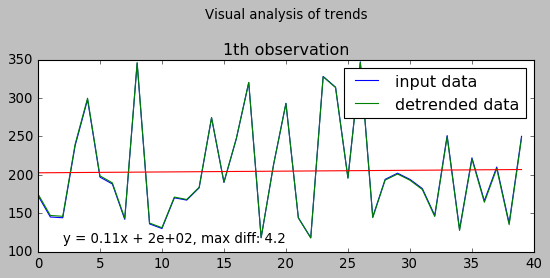

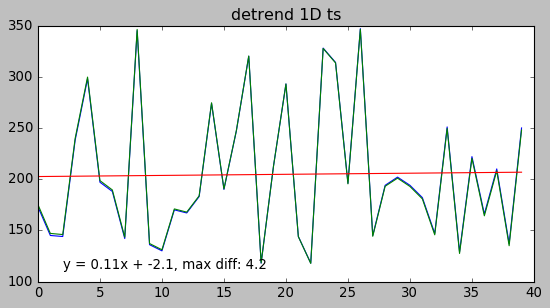

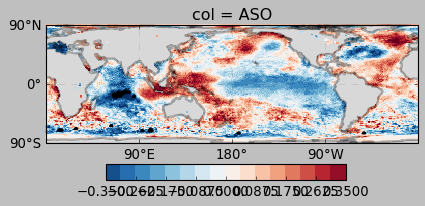

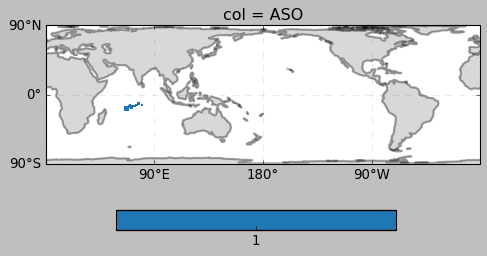

In [53]:
rg_changara_ond2 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [54]:
auc_rg_changara_ond2, bss_rg_changara_ond2 = pred(rg_changara_ond2, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.12
 AUC 0.30 
Train score
 BSS 0.07
 AUC 0.69


Text(0.5,0.98,'Severely dry events in Changara')

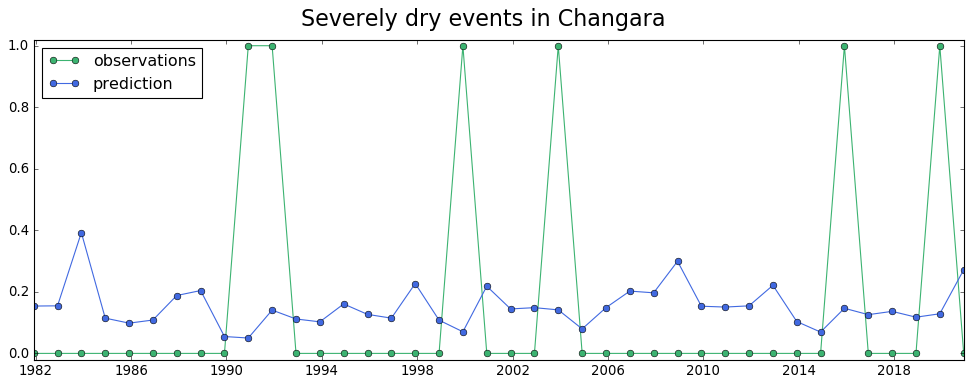

In [55]:
pred_tuple = rg_changara_ond2.pred_tuple
predict = pred_tuple[0]
predict_oos = functions_pp.get_df_test(predict, df_splits=rg_changara_ond2.df_splits) # Returns test data (only the data at which TrainIsTrue==False)
#plt.rcParams['']
plt.style.use('classic')
#plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, figsize=(15,5))
fig.patch.set_facecolor('xkcd:white')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,0], linestyle='solid', color='mediumseagreen', label='observations')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,1], linestyle='solid', color='royalblue', label='prediction')
ax.legend(loc = 2)
ax.set_ylim(-0.02, 1.02)
fig.suptitle('Severely dry events in Changara', size = 20)

## 3 months lead time (JAS)

In [56]:
start_end_year = (1981, 2020)
start_end_TVyear = (1981, 2020)


lags = np.array([['07-01', '09-01']])            
periodnames = ['JAS']                                         
start_end_TVdate = ('10-01', '12-01')

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('07-01', '09-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(39dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag JAS
Plotting Corr maps sst_labels_init, split 0, lag JAS

Getting MI timeseries
There are [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] regions in total (list of different splits)


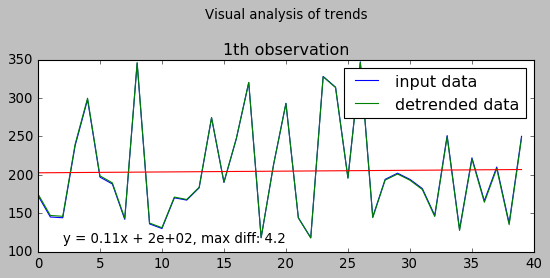

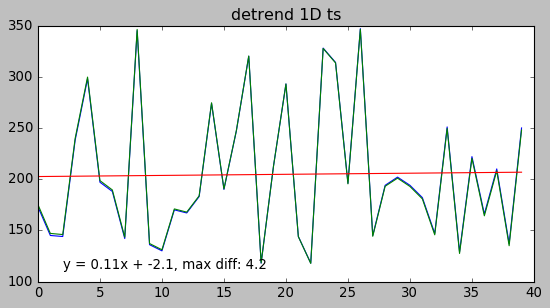

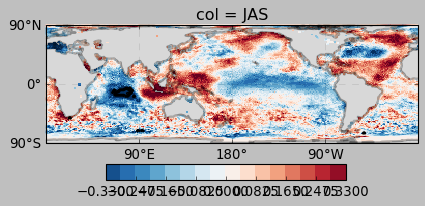

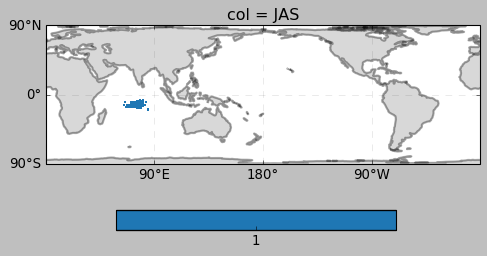

In [57]:
rg_changara_ond3 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [58]:
auc_rg_changara_ond3, bss_rg_changara_ond3 = pred(rg_changara_ond3, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.00
 AUC 0.70 
Train score
 BSS 0.21
 AUC 0.81


Text(0.5,0.98,'Severely dry events in Changara')

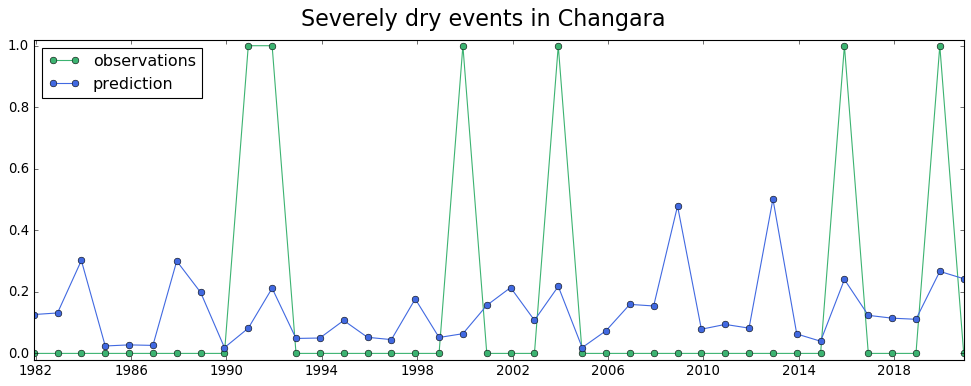

In [59]:
pred_tuple = rg_changara_ond3.pred_tuple
predict = pred_tuple[0]
predict_oos = functions_pp.get_df_test(predict, df_splits=rg_changara_ond3.df_splits) # Returns test data (only the data at which TrainIsTrue==False)
#plt.rcParams['']
plt.style.use('classic')
#plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, figsize=(15,5))
fig.patch.set_facecolor('xkcd:white')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,0], linestyle='solid', color='mediumseagreen', label='observations')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,1], linestyle='solid', color='royalblue', label='prediction')
ax.legend(loc = 2)
ax.set_ylim(-0.02, 1.02)
fig.suptitle('Severely dry events in Changara', size = 20)

## 4 months lead time (JJA)

In [60]:
start_end_year = (1981, 2020)
start_end_TVyear = (1981, 2020)


lags = np.array([['06-01', '08-01']])            
periodnames = ['JJA']                                         
start_end_TVdate = ('10-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('06-01', '08-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(39dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag JJA
Plotting Corr maps sst_labels_init, split 0, lag JJA

Getting MI timeseries
There are [2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2] regions in total (list of different splits)


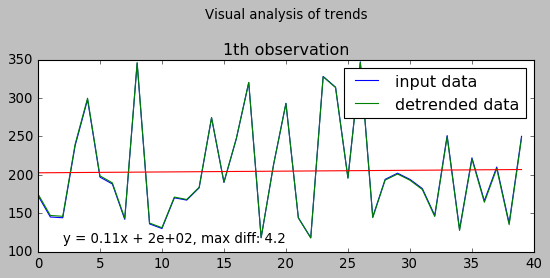

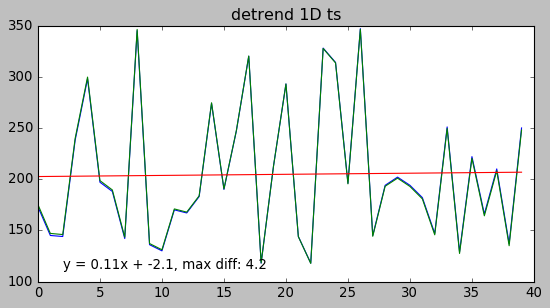

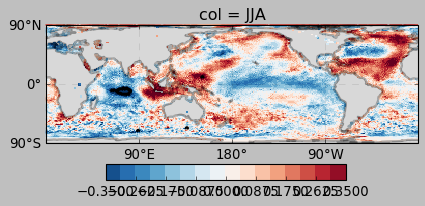

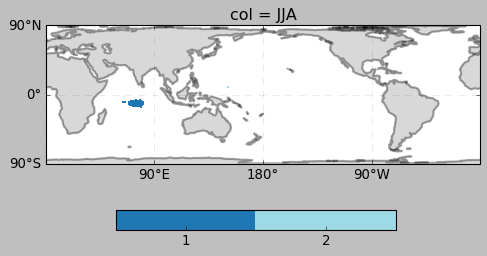

In [61]:
rg_changara_ond4 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [62]:
auc_rg_changara_ond4, bss_rg_changara_ond4 = pred(rg_changara_ond4, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS 0.14
 AUC 0.75 
Train score
 BSS 0.33
 AUC 0.89


Text(0.5,0.98,'Severely dry events in Changara')

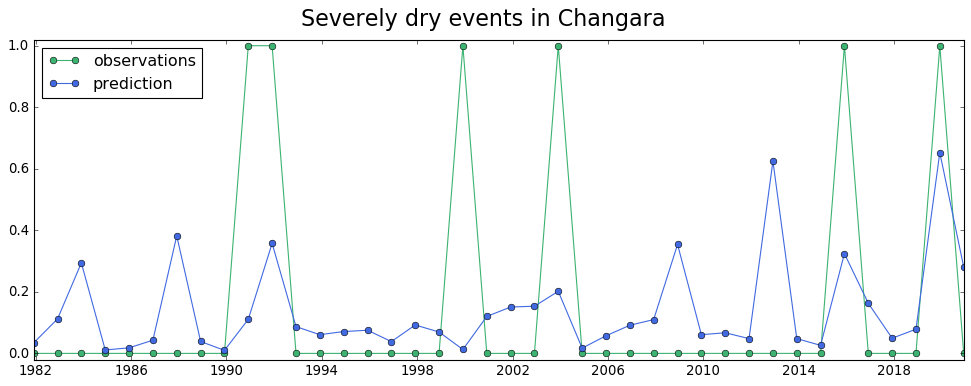

In [64]:
pred_tuple = rg_changara_ond4.pred_tuple
predict = pred_tuple[0]
predict_oos = functions_pp.get_df_test(predict, df_splits=rg_changara_ond4.df_splits) # Returns test data (only the data at which TrainIsTrue==False)
#plt.rcParams['']
plt.style.use('classic')
#plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, figsize=(15,5))
fig.patch.set_facecolor('xkcd:white')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,0], linestyle='solid', color='mediumseagreen', label='observations')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,1], linestyle='solid', color='royalblue', label='prediction')
ax.legend(loc = 2)
ax.set_ylim(-0.02, 1.02)
fig.suptitle('Severely dry events in Changara', size = 20)

## 5 months lead time (MJJ)

In [65]:
start_end_year = (1981, 2020)
start_end_TVyear = (1981, 2020)


lags = np.array([['05-01', '07-01']])            
periodnames = ['MJJ']                                         
start_end_TVdate = ('10-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('05-01', '07-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(39dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag MJJ
Plotting Corr maps sst_labels_init, split 0, lag MJJ

Getting MI timeseries
There are [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] regions in total (list of different splits)


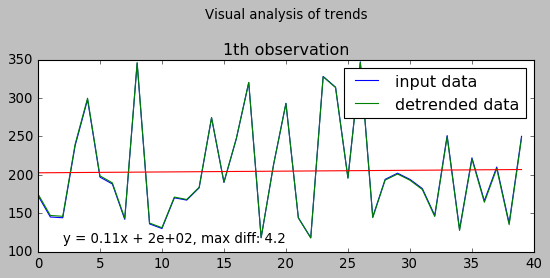

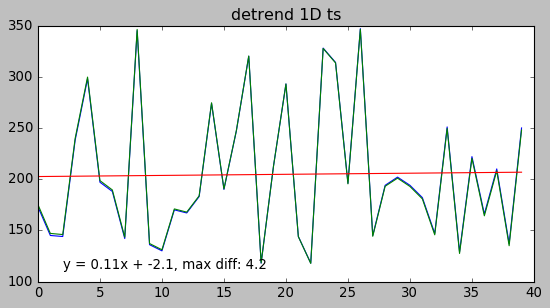

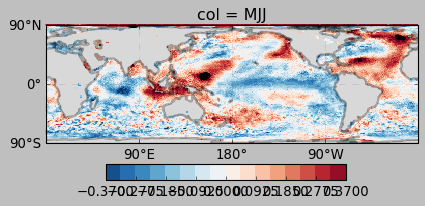

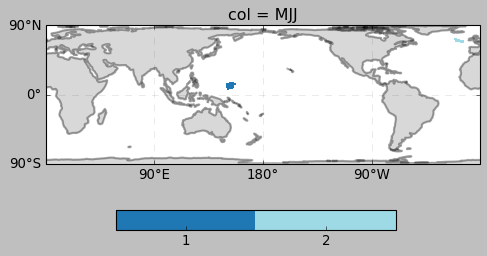

In [66]:
rg_changara_ond5 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [67]:
auc_rg_changara_ond5, bss_rg_changara_ond5 = pred(rg_changara_ond5, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.07
 AUC 0.00 
Train score
 BSS 0.00
 AUC 0.67


Text(0.5,0.98,'Severely dry events in Changara')

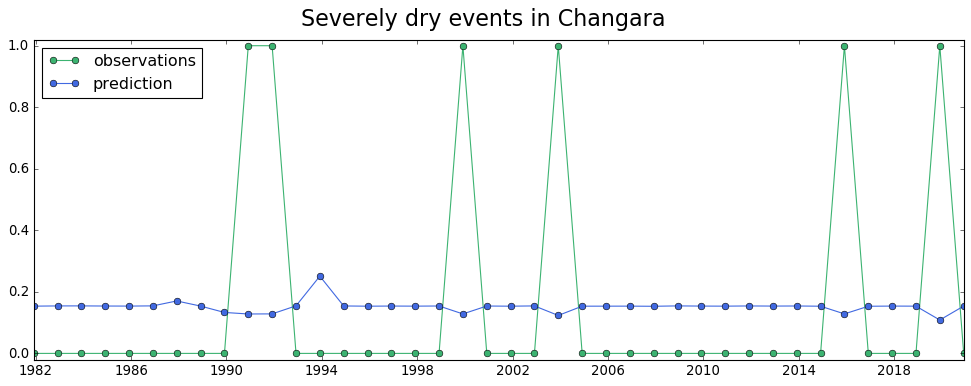

In [69]:
pred_tuple = rg_changara_ond5.pred_tuple
predict = pred_tuple[0]
predict_oos = functions_pp.get_df_test(predict, df_splits=rg_changara_ond5.df_splits) # Returns test data (only the data at which TrainIsTrue==False)
#plt.rcParams['']
plt.style.use('classic')
#plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, figsize=(15,5))
fig.patch.set_facecolor('xkcd:white')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,0], linestyle='solid', color='mediumseagreen', label='observations')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,1], linestyle='solid', color='royalblue', label='prediction')
ax.legend(loc = 2)
ax.set_ylim(-0.02, 1.02)
fig.suptitle('Severely dry events in Changara', size = 20)

In [70]:
predict_oos

RV1rainfall         0
1981-12-01            0  0.153545
1982-12-01            0  0.154310
1983-12-01            0  0.154430
1984-12-01            0  0.153952
1985-12-01            0  0.153791
1986-12-01            0  0.154470
1987-12-01            0  0.170427
1988-12-01            0  0.153766
1989-12-01            0  0.133082
1990-12-01            1  0.128124
1991-12-01            1  0.128413
1992-12-01            0  0.154548
1993-12-01            0  0.251069
1994-12-01            0  0.154210
1995-12-01            0  0.153449
1996-12-01            0  0.153899
1997-12-01            0  0.153583
1998-12-01            0  0.154077
1999-12-01            1  0.128288
2000-12-01            0  0.153982
2001-12-01            0  0.153463
2002-12-01            0  0.154329
2003-12-01            1  0.123365
2004-12-01            0  0.153490
2005-12-01            0  0.153516
2006-12-01            0  0.153628
2007-12-01            0  0.153147
2008-12-01            0  0.154397
2009-12-01            0  0.153804
2010-12-01            0  0.153553
2011-12-01            0  0.154230
2012-12-01            0  0.153815
2013-12-01            0  0.154097
2014-12-01            0  0.153374
2015-12-01            1  0.128374
2016-12-01            0  0.153240
2017-12-01            0  0.153799
2018-12-01            0  0.153542
2019-12-01            1  0.108546
2020-12-01            0  0.153857

Note that as we have a severely dry event the probability actually slightly drops

## 6 months lead time (AMJ)

In [71]:
start_end_year = (1981, 2020)
start_end_TVyear = (1981, 2020)

lags = np.array([['04-01', '06-01']])            
periodnames = ['AMJ']                                         
start_end_TVdate = ('10-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('04-01', '06-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(39dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag AMJ
Plotting Corr maps sst_labels_init, split 0, lag AMJ

Getting MI timeseries
There are [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] regions in total (list of different splits)


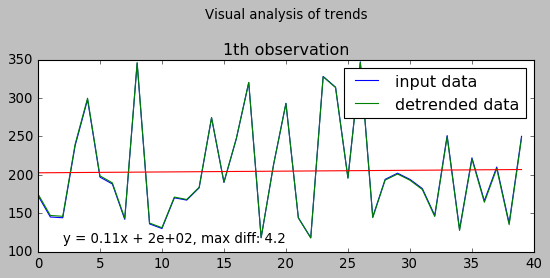

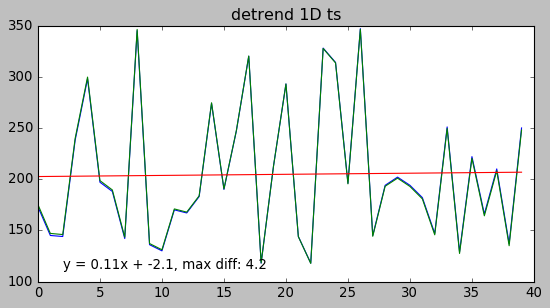

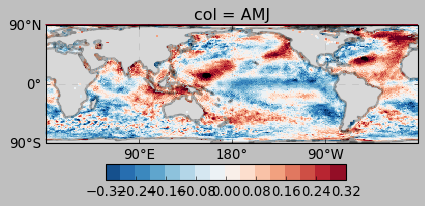

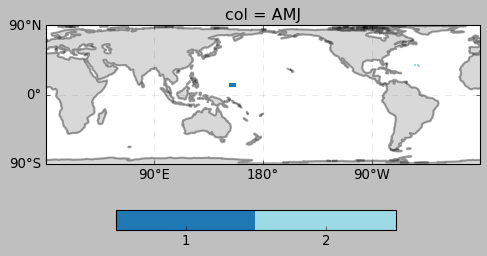

In [72]:
rg_changara_ond6 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [73]:
auc_rg_changara_ond6, bss_rg_changara_ond6 = pred(rg_changara_ond6, q = q)
# auc_rg_changara_ond6 = 0 
# bss_rg_changara_ond6 = 0

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (mi

LogisticRegression 
 Test score
 BSS -0.05
 AUC 0.16 
Train score
 BSS 0.02
 AUC 0.71


Text(0.5,0.98,'Severely dry events in Changara')

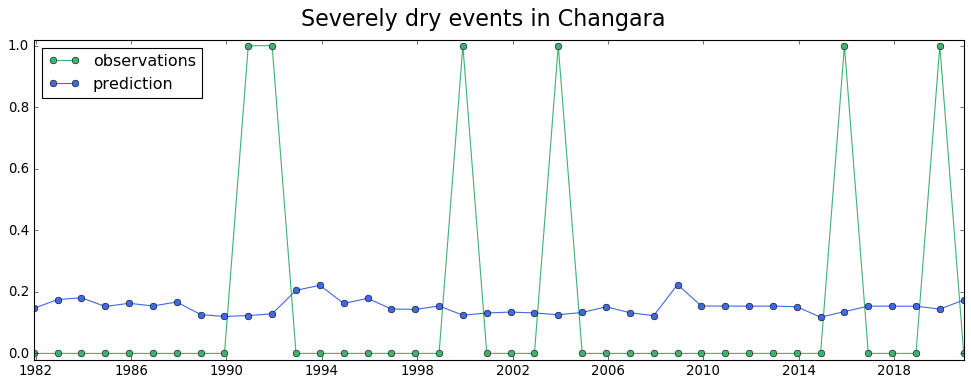

In [74]:
pred_tuple = rg_changara_ond6.pred_tuple
predict = pred_tuple[0]
predict_oos = functions_pp.get_df_test(predict, df_splits=rg_changara_ond6.df_splits) # Returns test data (only the data at which TrainIsTrue==False)
#plt.rcParams['']
plt.style.use('classic')
#plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, figsize=(15,5))
fig.patch.set_facecolor('xkcd:white')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,0], linestyle='solid', color='mediumseagreen', label='observations')
ax.plot_date(predict_oos.index, predict_oos.iloc[:,1], linestyle='solid', color='royalblue', label='prediction')
ax.legend(loc = 2)
ax.set_ylim(-0.02, 1.02)
fig.suptitle('Severely dry events in Changara', size = 20)

# To be able to access the skill scores without the need of executing the code, the results are saved to a file

In [234]:
auc_changara_ond = [auc_rg_changara_ond1, auc_rg_changara_ond2, auc_rg_changara_ond3, 
                auc_rg_changara_ond4, auc_rg_changara_ond5, auc_rg_changara_ond6]

bss_changara_ond = [bss_rg_changara_ond1, bss_rg_changara_ond2, bss_rg_changara_ond3,
                bss_rg_changara_ond4, bss_rg_changara_ond5, bss_rg_changara_ond6]

auc_changara_ond, bss_changara_ond

([0.09803921568627454,
  0.5098039215686274,
  0.6764705882352942,
  0.7303921568627452,
  0.02941176470588236,
  0.3382352941176471],
 [-0.13137842492873675,
  -0.08576908834623648,
  0.02089092926656935,
  0.12364965177498191,
  -0.060920972975134935,
  -0.09172384222818045])

In [235]:
leadtimes = np.linspace(1, 6, 6, dtype = int)
df_ond = pd.DataFrame(list(zip(leadtimes, auc_changara_ond, bss_changara_ond)), columns =['leadtime', 'AUC', 'BSS'])

In [236]:
df_ond

leadtime       AUC       BSS
0         1  0.098039 -0.131378
1         2  0.509804 -0.085769
2         3  0.676471  0.020891
3         4  0.730392  0.123650
4         5  0.029412 -0.060921
5         6  0.338235 -0.091724

# NDJ

In [138]:
# directory of target variable data
TV_path = os.path.join(district_data_path, 'changara_ndj1.nc')

# directory of precursor data
prec_path = os.path.join(data_path,'sst_1950-2020_1_12_monthly_1.0deg.nc')

# directory for test data 
path_test = os.path.join(my_main_dir, 'test')

# directory for output
output_path = os.path.join(my_main_dir, 'out')

list_of_name_path = [(1, TV_path), ('sst', prec_path)]

In [139]:
core_pp.import_ds_lazy(TV_path)

<xarray.DataArray 'rainfall' (time: 39)>
array([274., 169., 205., 458., 523., 352., 358., 286., 581., 237., 193., 347.,
       295., 308., 437., 433., 439., 609., 313., 336., 395., 317., 271., 461.,
       464., 425., 563., 383., 275., 480., 346., 399., 355., 406., 219., 478.,
       185., 465., 323.])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1983-01-01 ... 2020-01-01

## 1 month lead time (OND)

In [140]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['10-01', '12-01']])            
periodnames = ['OND']                                         
start_end_TVdate = ('01-01', '11-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('10-01', '12-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag OND
Plotting Corr maps sst_labels_init, split 0, lag OND

Getting MI timeseries
There are [8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 8, 6, 8, 7, 8, 8] regions in total (list of different splits)


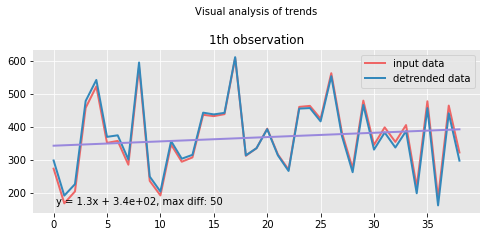

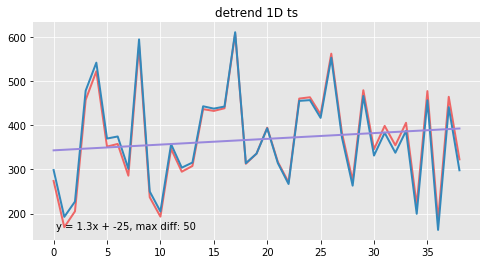

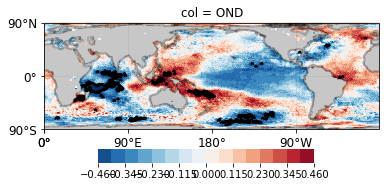

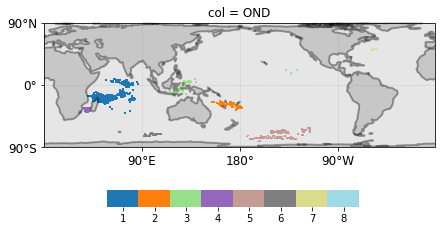

In [141]:
rg_changara_ndj1 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [216]:
auc_rg_changara_ndj1, bss_rg_changara_ndj1 = pred(rg_changara_ndj1, q = q)

LogisticRegressionCV 
 Test score
 BSS 0.01
 AUC 0.59 
Train score
 BSS 0.55
 AUC 0.95


## 2 months lead time (SON)

In [143]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['09-01', '11-01']])            
periodnames = ['SON']                                         
start_end_TVdate = ('01-01', '11-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('09-01', '11-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag SON
Plotting Corr maps sst_labels_init, split 0, lag SON

Getting MI timeseries
There are [7, 8, 8, 9, 8, 9, 9, 9, 7, 7, 7, 9, 9, 8, 9, 8, 9, 6, 9, 9, 8, 9, 9, 9, 9, 9, 7, 9, 7, 7, 9, 8, 9, 9, 7, 7, 9, 8, 9] regions in total (list of different splits)


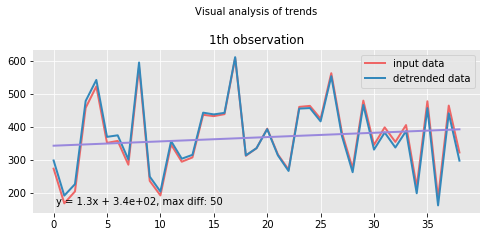

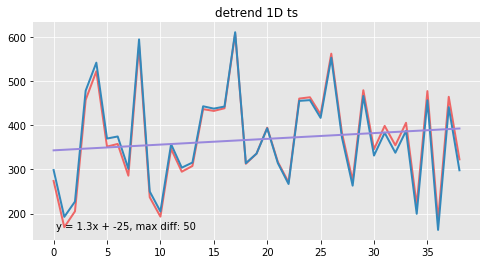

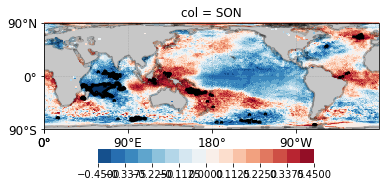

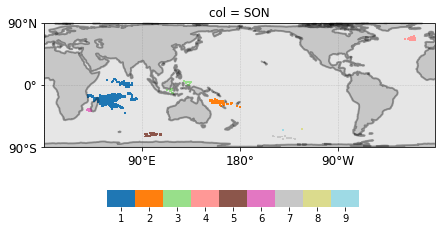

In [144]:
rg_changara_ndj2 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [217]:
auc_rg_changara_ndj2, bss_rg_changara_ndj2 = pred(rg_changara_ndj2, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.11
 AUC 0.66 
Train score
 BSS 0.43
 AUC 0.95


## 3 months lead time (ASO)

In [146]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['08-01', '10-01']])            
periodnames = ['ASO']                                         
start_end_TVdate = ('01-01', '11-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('08-01', '10-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag ASO
Plotting Corr maps sst_labels_init, split 0, lag ASO

Getting MI timeseries
There are [6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6] regions in total (list of different splits)


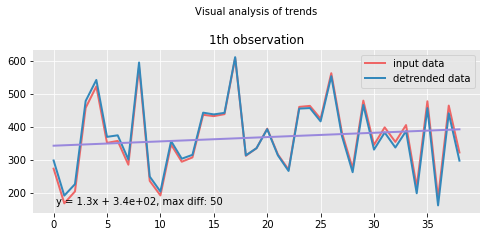

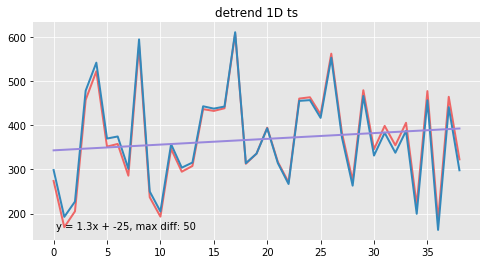

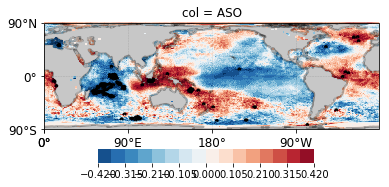

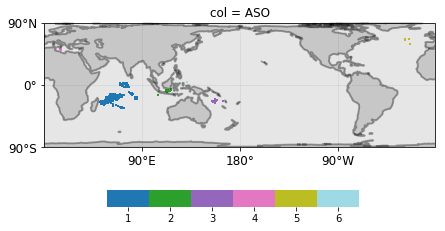

In [147]:
rg_changara_ndj3 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [218]:
auc_rg_changara_ndj3, bss_rg_changara_ndj3 = pred(rg_changara_ndj3, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.14
 AUC 0.43 
Train score
 BSS 0.15
 AUC 0.80


## 4 months lead time (JAS)

In [149]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['07-01', '09-01']])            
periodnames = ['JAS']                                         
start_end_TVdate = ('01-01', '11-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('07-01', '09-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag JAS
Plotting Corr maps sst_labels_init, split 0, lag JAS

Getting MI timeseries
There are [5, 2, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5] regions in total (list of different splits)


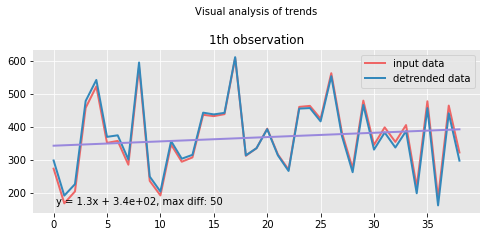

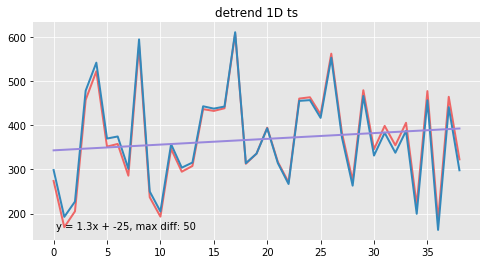

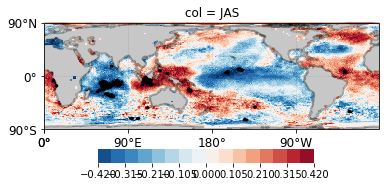

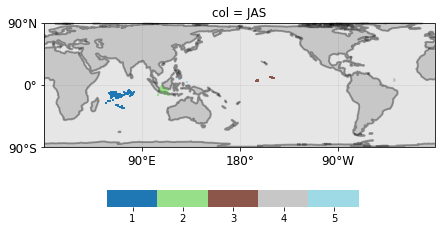

In [150]:
rg_changara_ndj4 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [219]:
auc_rg_changara_ndj4, bss_rg_changara_ndj4 = pred(rg_changara_ndj4, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.13
 AUC 0.52 
Train score
 BSS 0.29
 AUC 0.84


## 5 months lead time (JJA)

In [152]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['06-01', '08-01']])            
periodnames = ['JJA']                                         
start_end_TVdate = ('01-01', '11-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('06-01', '08-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag JJA
Plotting Corr maps sst_labels_init, split 0, lag JJA

Getting MI timeseries
There are [7, 3, 7, 6, 7, 7, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 3, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 4, 5, 5, 7, 7] regions in total (list of different splits)


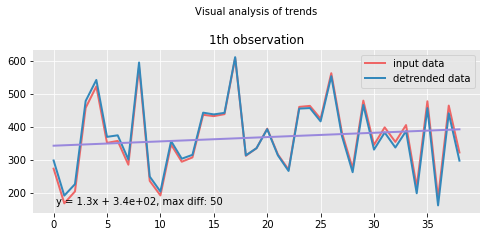

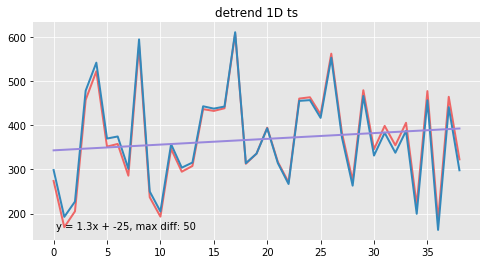

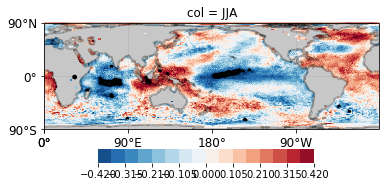

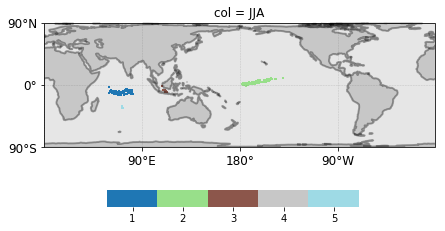

In [153]:
rg_changara_ndj5 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [220]:
auc_rg_changara_ndj5, bss_rg_changara_ndj5 = pred(rg_changara_ndj5, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.06
 AUC 0.56 
Train score
 BSS 0.41
 AUC 0.94


## 6 months lead time (MJJ)

In [155]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['05-01', '07-01']])            
periodnames = ['MJJ']                                         
start_end_TVdate = ('01-01', '11-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('05-01', '07-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag MJJ
Plotting Corr maps sst_labels_init, split 0, lag MJJ

Getting MI timeseries
There are [4, 3, 3, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4] regions in total (list of different splits)


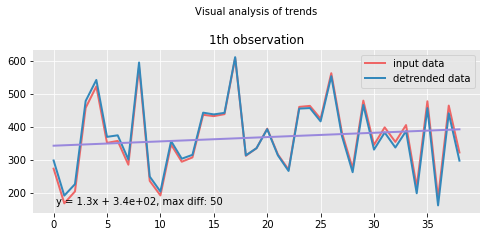

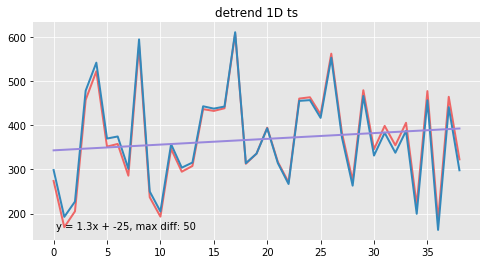

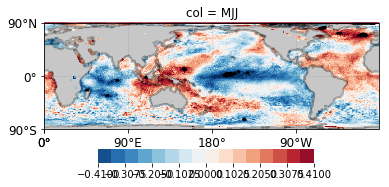

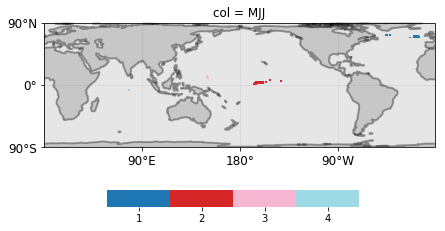

In [156]:
rg_changara_ndj6 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [221]:
auc_rg_changara_ndj6, bss_rg_changara_ndj6 = pred(rg_changara_ndj6, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.04
 AUC 0.70 
Train score
 BSS 0.44
 AUC 0.92


In [237]:
auc_changara_ndj = [auc_rg_changara_ndj1, auc_rg_changara_ndj2, auc_rg_changara_ndj3, 
                auc_rg_changara_ndj4, auc_rg_changara_ndj5, auc_rg_changara_ndj6]

bss_changara_ndj = [bss_rg_changara_ndj1, bss_rg_changara_ndj2, bss_rg_changara_ndj3,
                bss_rg_changara_ndj4, bss_rg_changara_ndj5, bss_rg_changara_ndj6]

auc_changara_ndj, bss_changara_ndj

([0.5858585858585857,
  0.6565656565656566,
  0.4343434343434343,
  0.5202020202020201,
  0.5555555555555556,
  0.6969696969696969],
 [0.0057508546933250256,
  -0.10857657313330818,
  -0.1406424380175479,
  -0.12635822291448218,
  -0.05723860906314402,
  -0.04016927923938095])

In [238]:
leadtimes = np.linspace(1, 6, 6, dtype = int)
df_ndj = pd.DataFrame(list(zip(leadtimes, auc_changara_ndj, bss_changara_ndj)), columns =['leadtime', 'AUC', 'BSS'])
df_ndj

leadtime       AUC       BSS
0         1  0.585859  0.005751
1         2  0.656566 -0.108577
2         3  0.434343 -0.140642
3         4  0.520202 -0.126358
4         5  0.555556 -0.057239
5         6  0.696970 -0.040169

# DJF

In [160]:
# directory of target variable data
TV_path = os.path.join(district_data_path, 'changara_djf.nc')

# directory of precursor data
prec_path = os.path.join(data_path,'sst_1950-2020_1_12_monthly_1.0deg.nc')

# directory for test data 
path_test = os.path.join(my_main_dir, 'test')

# directory for output
output_path = os.path.join(my_main_dir, 'out')

list_of_name_path = [(1, TV_path), ('sst', prec_path)]

## 1 month lead time (NDJ)

In [161]:
start_end_year = (1981, 2020)
start_end_TVyear = (1982, 2020)

lags = np.array([['11-01', '01-01']])            
periodnames = ['NDJ']                                         
start_end_TVdate = ('02-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('11-01', '01-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag NDJ
Plotting Corr maps sst_labels_init, split 0, lag NDJ

Getting MI timeseries
There are [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] regions in total (list of different splits)


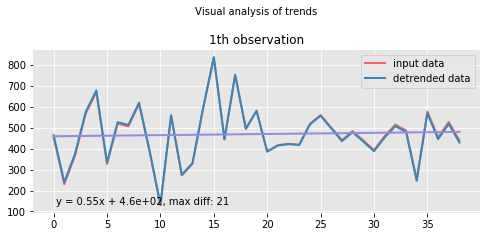

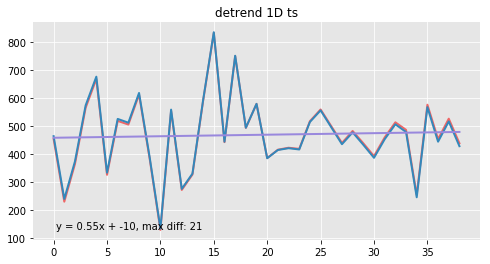

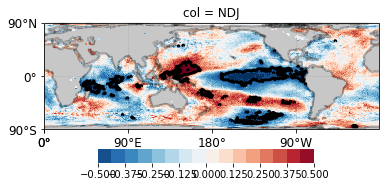

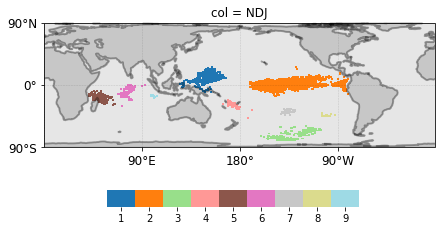

In [162]:
rg_changara_djf1 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [222]:
auc_rg_changara_djf1, bss_rg_changara_djf1 = pred(rg_changara_djf1, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.02
 AUC 0.79 
Train score
 BSS 0.52
 AUC 0.96


## 2 months lead time (OND)

In [164]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['10-01', '12-01']])            
periodnames = ['OND']                                         
start_end_TVdate = ('02-01', '12-01')   

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('10-01', '12-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag OND
Plotting Corr maps sst_labels_init, split 0, lag OND

Getting MI timeseries
There are [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6] regions in total (list of different splits)


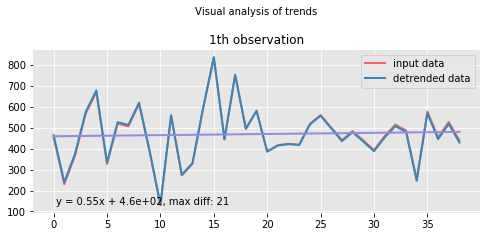

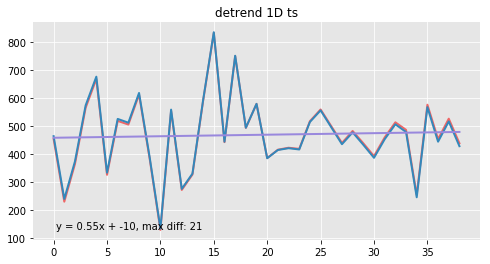

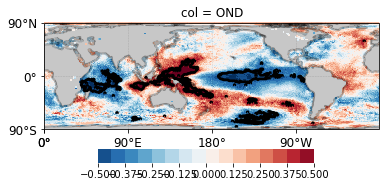

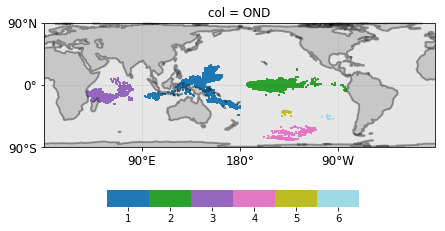

In [165]:
rg_changara_djf2 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [223]:
auc_rg_changara_djf2, bss_rg_changara_djf2 = pred(rg_changara_djf2, q = q)

LogisticRegressionCV 
 Test score
 BSS 0.10
 AUC 0.83 
Train score
 BSS 0.62
 AUC 0.98


## 3 months lead time (SON)

In [167]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['09-01', '11-01']])            
periodnames = ['SON']                                         
start_end_TVdate = ('02-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('09-01', '11-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag SON
Plotting Corr maps sst_labels_init, split 0, lag SON

Getting MI timeseries
There are [10, 9, 10, 9, 9, 9, 10, 10, 9, 10, 9, 9, 10, 9, 9, 9, 10, 8, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10] regions in total (list of different splits)


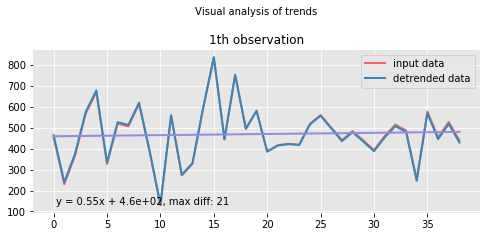

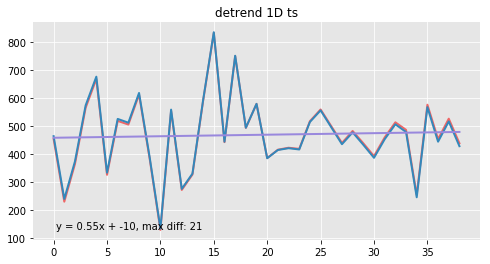

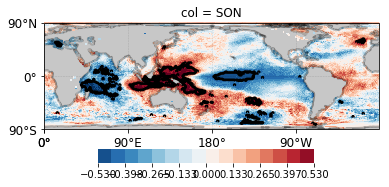

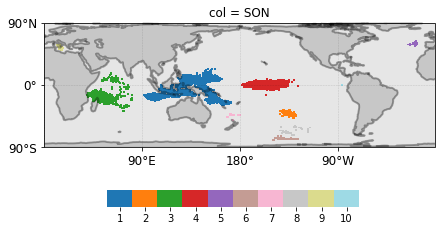

In [168]:
rg_changara_djf3 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [224]:
auc_rg_changara_djf3, bss_rg_changara_djf3 = pred(rg_changara_djf3, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.05
 AUC 0.87 
Train score
 BSS 0.78
 AUC 1.00


## 4 months lead time (ASO)

In [170]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['08-01', '10-01']])            
periodnames = ['ASO']                                         
start_end_TVdate = ('02-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('08-01', '10-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag ASO
Plotting Corr maps sst_labels_init, split 0, lag ASO

Getting MI timeseries
There are [11, 10, 11, 10, 10, 11, 11, 11, 10, 11, 10, 11, 11, 10, 11, 9, 11, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11, 11] regions in total (list of different splits)


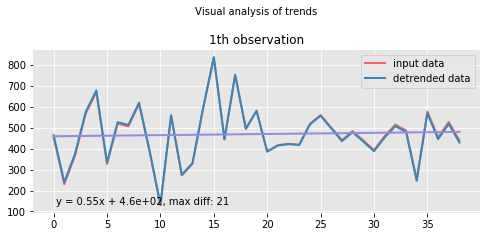

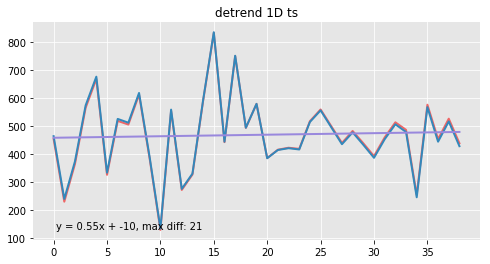

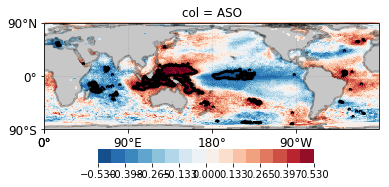

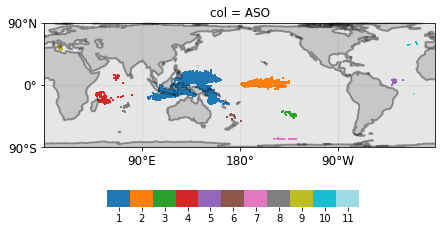

In [171]:
rg_changara_djf4 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [225]:
auc_rg_changara_djf4, bss_rg_changara_djf4 = pred(rg_changara_djf4, q = q)

LogisticRegressionCV 
 Test score
 BSS 0.41
 AUC 0.93 
Train score
 BSS 0.98
 AUC 1.00


## 5 months lead time (JAS)

In [173]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)


lags = np.array([['07-01', '09-01']])            
periodnames = ['JAS']                                         
start_end_TVdate = ('02-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('07-01', '09-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag JAS
Plotting Corr maps sst_labels_init, split 0, lag JAS

Getting MI timeseries
There are [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7] regions in total (list of different splits)


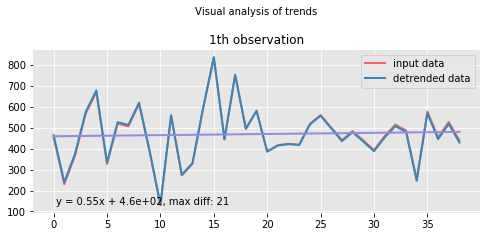

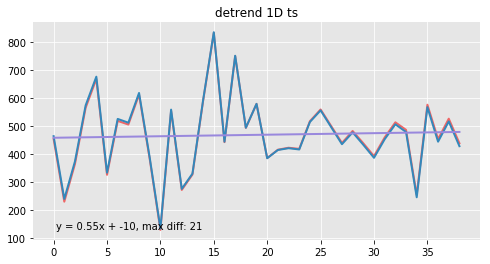

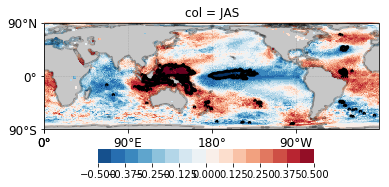

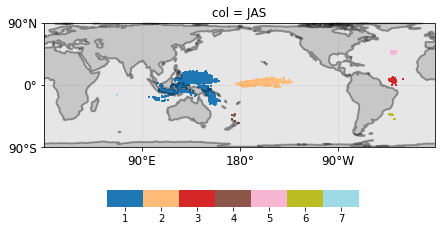

In [174]:
rg_changara_djf5 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [226]:
auc_rg_changara_djf5, bss_rg_changara_djf5 = pred(rg_changara_djf5, q = q)

LogisticRegressionCV 
 Test score
 BSS 0.06
 AUC 0.87 
Train score
 BSS 0.86
 AUC 1.00


## 6 months lead time (JJA)

In [176]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['06-01', '08-01']])            
periodnames = ['JJA']                                         
start_end_TVdate = ('02-01', '12-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('06-01', '08-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag JJA
Plotting Corr maps sst_labels_init, split 0, lag JJA

Getting MI timeseries
There are [9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 6, 9, 9, 9, 9, 8, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9] regions in total (list of different splits)


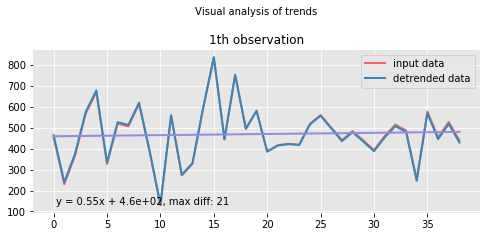

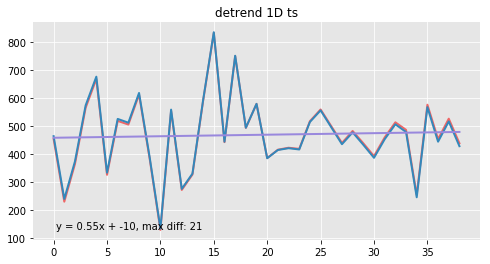

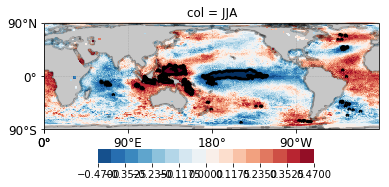

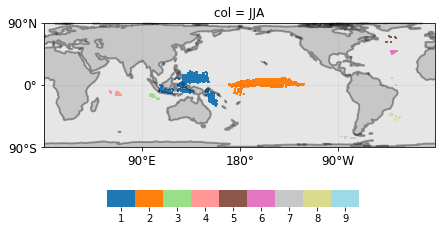

In [177]:
rg_changara_djf6 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [227]:
auc_rg_changara_djf6, bss_rg_changara_djf6 = pred(rg_changara_djf6, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.11
 AUC 0.75 
Train score
 BSS 0.79
 AUC 0.99


In [239]:
auc_changara_djf = [auc_rg_changara_djf1, auc_rg_changara_djf2, auc_rg_changara_djf3, 
                    auc_rg_changara_djf4, auc_rg_changara_djf5, auc_rg_changara_djf6]

bss_changara_djf = [bss_rg_changara_djf1, bss_rg_changara_djf2, bss_rg_changara_djf3,
                    bss_rg_changara_djf4, bss_rg_changara_djf5, bss_rg_changara_djf6]

auc_changara_djf, bss_changara_djf

([0.7929292929292929,
  0.8282828282828283,
  0.8737373737373737,
  0.9343434343434343,
  0.8686868686868686,
  0.7525252525252525],
 [-0.022105523826250154,
  0.10289386374091411,
  -0.04605191948072096,
  0.4071731654175384,
  0.06422095551340966,
  -0.11407568556942062])

In [240]:
leadtimes = np.linspace(1, 6, 6, dtype = int)
df_djf = pd.DataFrame(list(zip(leadtimes, auc_changara_djf, bss_changara_djf)), columns =['leadtime', 'AUC', 'BSS'])
df_djf

leadtime       AUC       BSS
0         1  0.792929 -0.022106
1         2  0.828283  0.102894
2         3  0.873737 -0.046052
3         4  0.934343  0.407173
4         5  0.868687  0.064221
5         6  0.752525 -0.114076

# JFM

In [181]:
# directory of target variable data
TV_path = os.path.join(district_data_path, 'changara_jfm.nc')

# directory of precursor data
prec_path = os.path.join(data_path,'sst_1950-2020_1_12_monthly_1.0deg.nc')

# directory for test data 
path_test = os.path.join(my_main_dir, 'test')

# directory for output
output_path = os.path.join(my_main_dir, 'out')

list_of_name_path = [(1, TV_path), ('sst', prec_path)]

## 1 month lead time (DJF)

In [182]:
start_end_year = (1981, 2020)
start_end_TVyear = (1982, 2020)

lags = np.array([['12-01', '02-01']])            
periodnames = ['DJF']                                         
start_end_TVdate = ('01-01', '03-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('12-01', '02-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag DJF
Plotting Corr maps sst_labels_init, split 0, lag DJF

Getting MI timeseries
There are [9, 7, 10, 9, 9, 8, 9, 8, 10, 10, 7, 10, 9, 8, 10, 10, 9, 7, 9, 9, 10, 10, 9, 10, 10, 9, 9, 10, 10, 10, 10, 9, 9, 9, 8, 10, 10, 9, 10] regions in total (list of different splits)


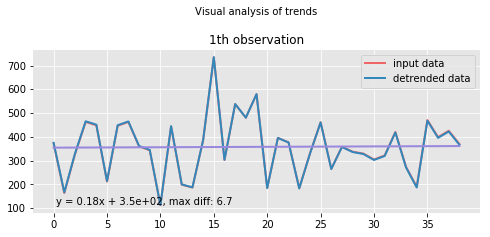

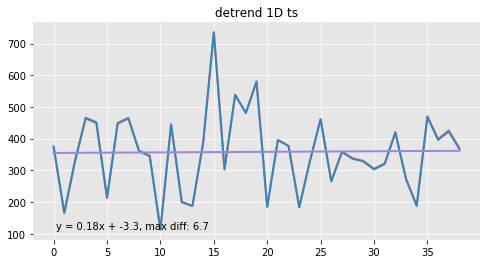

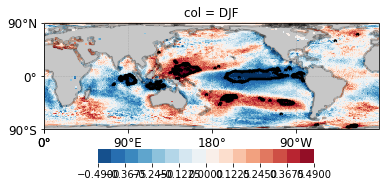

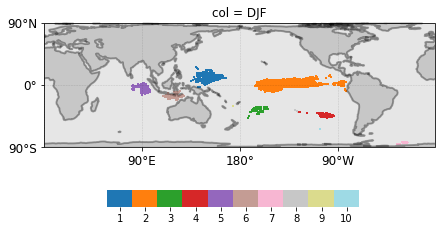

In [183]:
rg_changara_jfm1 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [228]:
auc_rg_changara_jfm1, bss_rg_changara_jfm1 = pred(rg_changara_jfm1, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.17
 AUC 0.59 
Train score
 BSS 0.37
 AUC 0.91


## 2 months lead time (NDJ)

In [185]:
start_end_year = (1981, 2020)
start_end_TVyear = (1982, 2020)

lags = np.array([['11-01', '01-01']])            
periodnames = ['NDJ']                                         
start_end_TVdate = ('01-01', '03-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2020] ('11-01', '01-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag NDJ
Plotting Corr maps sst_labels_init, split 0, lag NDJ

Getting MI timeseries
There are [12, 8, 12, 12, 12, 10, 12, 12, 12, 12, 8, 12, 12, 8, 12, 11, 12, 7, 8, 10, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 10, 12, 12, 12] regions in total (list of different splits)


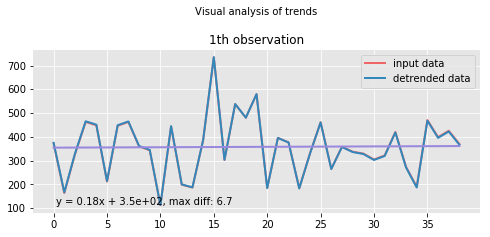

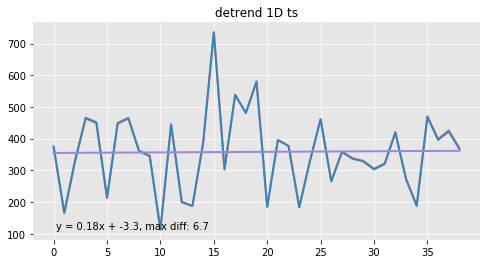

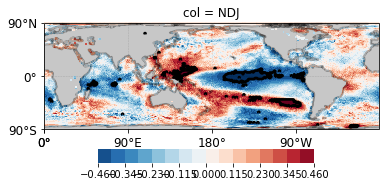

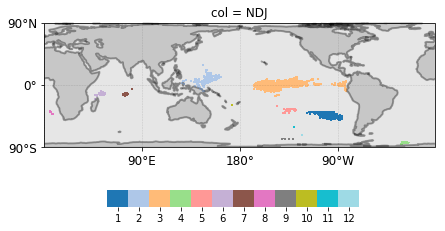

In [186]:
rg_changara_jfm2 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [229]:
auc_rg_changara_jfm2, bss_rg_changara_jfm2 = pred(rg_changara_jfm2, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.17
 AUC 0.57 
Train score
 BSS 0.32
 AUC 0.90


## 3 months lead time (OND)

In [188]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['10-01', '12-01']])            
periodnames = ['OND']                                         
start_end_TVdate = ('01-01', '03-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('10-01', '12-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag OND
Plotting Corr maps sst_labels_init, split 0, lag OND

Getting MI timeseries
There are [12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 10, 12, 12, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 12, 12] regions in total (list of different splits)


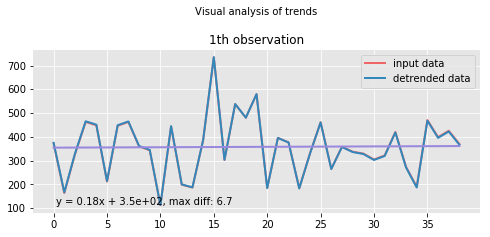

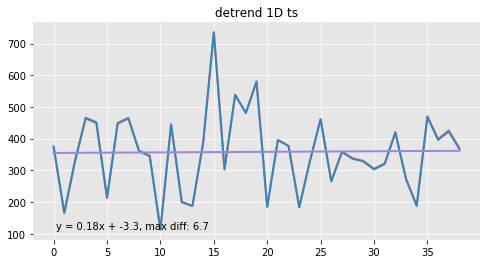

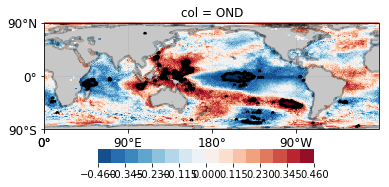

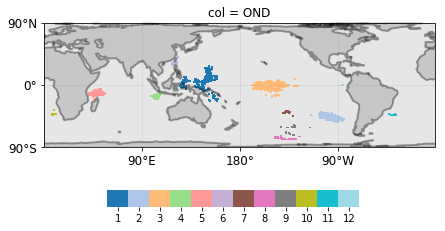

In [189]:
rg_changara_jfm3 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [230]:
auc_rg_changara_jfm3, bss_rg_changara_jfm3 = pred(rg_changara_jfm3, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

LogisticRegressionCV 
 Test score
 BSS 0.02
 AUC 0.66 
Train score
 BSS 0.28
 AUC 0.91


## 4 months lead time (SON)

In [191]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['09-01', '11-01']])            
periodnames = ['SON']                                         
start_end_TVdate = ('01-01', '03-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('09-01', '11-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag SON
Plotting Corr maps sst_labels_init, split 0, lag SON

Getting MI timeseries
There are [9, 7, 9, 9, 9, 8, 9, 8, 9, 9, 7, 9, 8, 8, 9, 9, 8, 6, 8, 9, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 8, 8, 9, 9, 9] regions in total (list of different splits)


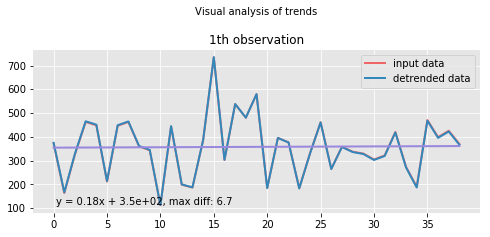

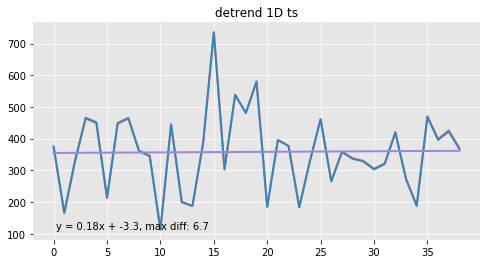

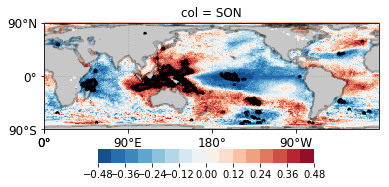

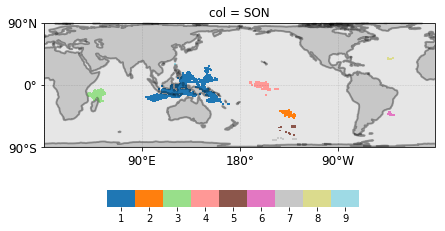

In [192]:
rg_changara_jfm4 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [231]:
auc_rg_changara_jfm4, bss_rg_changara_jfm4 = pred(rg_changara_jfm4, q = q)

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

LogisticRegressionCV 
 Test score
 BSS 0.04
 AUC 0.72 
Train score
 BSS 0.50
 AUC 0.96


## 5 months lead time (ASO)

In [194]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['08-01', '10-01']])            
periodnames = ['ASO']                                         
start_end_TVdate = ('01-01', '03-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('08-01', '10-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag ASO
Plotting Corr maps sst_labels_init, split 0, lag ASO

Getting MI timeseries
There are [9, 6, 9, 8, 9, 6, 8, 7, 9, 9, 5, 9, 7, 6, 9, 7, 8, 7, 6, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 9, 8, 9] regions in total (list of different splits)


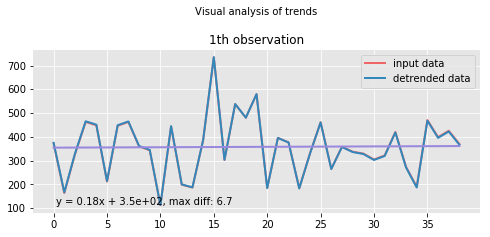

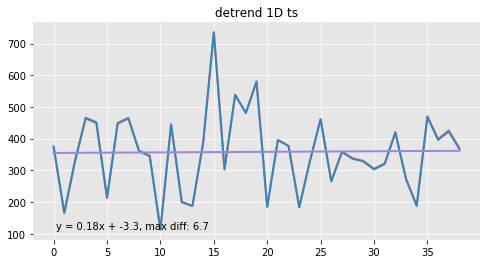

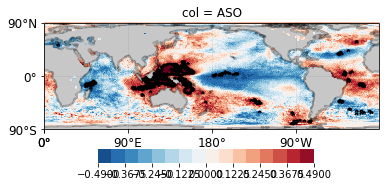

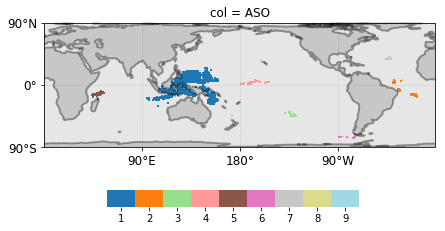

In [195]:
rg_changara_jfm5 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [232]:
auc_rg_changara_jfm5, bss_rg_changara_jfm5 = pred(rg_changara_jfm5, q = q)

LogisticRegressionCV 
 Test score
 BSS 0.04
 AUC 0.69 
Train score
 BSS 0.50
 AUC 0.93


## 6 months lead time (JAS)

In [197]:
start_end_year = (1981, 2019)
start_end_TVyear = (1982, 2020)

lags = np.array([['07-01', '09-01']])            
periodnames = ['JAS']                                         
start_end_TVdate = ('01-01', '03-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1981 2019] ('07-01', '09-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(38dp, 97%)



C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: invalid value encountered in sign
  result_data = func(*input_data)
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False
C:\Users\alicj\Documents\GitHub\RGCPD\RGCPD\find_precursors.py:98: RuntimeWarning: invalid value encountered in sign
  mask[np.sign(data) != sign] = False


Plotting Corr maps sst, split 0, lag JAS
Plotting Corr maps sst_labels_init, split 0, lag JAS

Getting MI timeseries
There are [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7] regions in total (list of different splits)


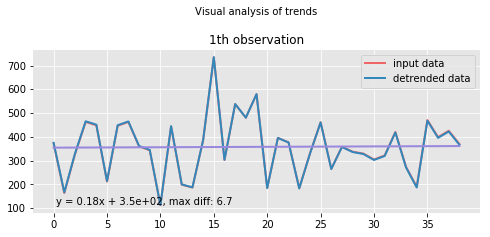

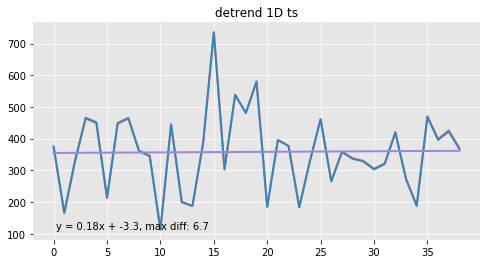

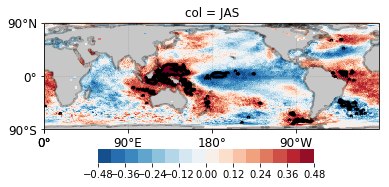

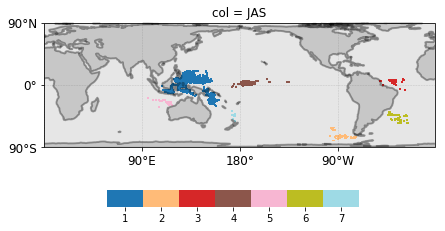

In [198]:
rg_changara_jfm6 = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, 
                            min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, TVdates_aggr, 
                            ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, 
                            start_end_TVdate, name)

In [233]:
auc_rg_changara_jfm6, bss_rg_changara_jfm6 = pred(rg_changara_jfm6, q = q)

LogisticRegressionCV 
 Test score
 BSS -0.01
 AUC 0.72 
Train score
 BSS 0.53
 AUC 0.98


In [241]:
auc_changara_jfm = [auc_rg_changara_jfm1, auc_rg_changara_jfm2, auc_rg_changara_jfm3, 
                    auc_rg_changara_jfm4, auc_rg_changara_jfm5, auc_rg_changara_jfm6]

bss_changara_jfm = [bss_rg_changara_jfm1, bss_rg_changara_jfm2, bss_rg_changara_jfm3,
                    bss_rg_changara_jfm4, bss_rg_changara_jfm5, bss_rg_changara_jfm6]

auc_changara_jfm, bss_changara_jfm

([0.5858585858585859,
  0.5656565656565657,
  0.6616161616161618,
  0.7171717171717171,
  0.6919191919191919,
  0.7171717171717171],
 [-0.17452163882434005,
  -0.1650888462290426,
  0.018463223724797886,
  0.042629842781343484,
  0.039845560398316965,
  -0.012996403656629097])

In [242]:
periods = ['OND', 'NDJ', 'DJF', 'JFM']
leadtimes = np.linspace(1, 6, 6, dtype = int)
df_jfm = pd.DataFrame(list(zip(leadtimes, auc_changara_jfm, bss_changara_jfm)), columns =['leadtime', 'AUC', 'BSS'])
df_jfm

leadtime       AUC       BSS
0         1  0.585859 -0.174522
1         2  0.565657 -0.165089
2         3  0.661616  0.018463
3         4  0.717172  0.042630
4         5  0.691919  0.039846
5         6  0.717172 -0.012996

## Creating heatmaps of AUC and BSS

In [243]:
auc_changara = np.array([auc_changara_ond, auc_changara_ndj, auc_changara_djf, auc_changara_jfm])
auc_changara

array([[0.09803922, 0.50980392, 0.67647059, 0.73039216, 0.02941176,
        0.33823529],
       [0.58585859, 0.65656566, 0.43434343, 0.52020202, 0.55555556,
        0.6969697 ],
       [0.79292929, 0.82828283, 0.87373737, 0.93434343, 0.86868687,
        0.75252525],
       [0.58585859, 0.56565657, 0.66161616, 0.71717172, 0.69191919,
        0.71717172]])

In [250]:
auc_changara_15 = np.array([[0.09803922, 0.50980392, 0.67647059, 0.73039216, 0.02941176,
        0.33823529],
       [0.58585859, 0.65656566, 0.43434343, 0.52020202, 0.55555556,
        0.6969697 ],
       [0.79292929, 0.82828283, 0.87373737, 0.93434343, 0.86868687,
        0.75252525],
       [0.58585859, 0.56565657, 0.66161616, 0.71717172, 0.69191919,
        0.71717172]])

In [5]:
auc_changara_33 = np.array([[0.66208791, 0.59340659, 0.64835165, 0.60989011, 0.75549451,
        0.66483516],
       [0.66568047, 0.83727811, 0.71893491, 0.67751479, 0.57692308,
        0.73076923],
       [0.70710059, 0.73668639, 0.73076923, 0.68047337, 0.60946746,
        0.5887574 ],
       [0.63017751, 0.69822485, 0.60946746, 0.70710059, 0.65680473,
        0.71893491]])
auc_changara_33

array([[0.66208791, 0.59340659, 0.64835165, 0.60989011, 0.75549451,
        0.66483516],
       [0.66568047, 0.83727811, 0.71893491, 0.67751479, 0.57692308,
        0.73076923],
       [0.70710059, 0.73668639, 0.73076923, 0.68047337, 0.60946746,
        0.5887574 ],
       [0.63017751, 0.69822485, 0.60946746, 0.70710059, 0.65680473,
        0.71893491]])

In [245]:
bss_changara = np.array([bss_changara_ond, bss_changara_ndj, bss_changara_djf, bss_changara_jfm])
bss_changara

array([[-0.13137842, -0.08576909,  0.02089093,  0.12364965, -0.06092097,
        -0.09172384],
       [ 0.00575085, -0.10857657, -0.14064244, -0.12635822, -0.05723861,
        -0.04016928],
       [-0.02210552,  0.10289386, -0.04605192,  0.40717317,  0.06422096,
        -0.11407569],
       [-0.17452164, -0.16508885,  0.01846322,  0.04262984,  0.03984556,
        -0.0129964 ]])

In [246]:
bss_changara_15 = np.array([[-0.13137842, -0.08576909,  0.02089093,  0.12364965, -0.06092097,
        -0.09172384],
       [ 0.00575085, -0.10857657, -0.14064244, -0.12635822, -0.05723861,
        -0.04016928],
       [-0.02210552,  0.10289386, -0.04605192,  0.40717317,  0.06422096,
        -0.11407569],
       [-0.17452164, -0.16508885,  0.01846322,  0.04262984,  0.03984556,
        -0.0129964 ]])

In [6]:
bss_changara_33 = np.array([[ 0.07867348, -0.0169593 ,  0.04602479, -0.03696171,  0.22388225,
         0.05131338],
       [ 0.12172469,  0.31879335,  0.02499731,  0.01796089, -0.18075144,
         0.12821608],
       [-0.01591526,  0.07921585,  0.1641704 ,  0.05587007,  0.01234371,
        -0.06211952],
       [ 0.02419317, -0.03169332, -0.03548119,  0.11402575,  0.09013745,
         0.20886092]])
bss_changara_33

array([[ 0.07867348, -0.0169593 ,  0.04602479, -0.03696171,  0.22388225,
         0.05131338],
       [ 0.12172469,  0.31879335,  0.02499731,  0.01796089, -0.18075144,
         0.12821608],
       [-0.01591526,  0.07921585,  0.1641704 ,  0.05587007,  0.01234371,
        -0.06211952],
       [ 0.02419317, -0.03169332, -0.03548119,  0.11402575,  0.09013745,
         0.20886092]])

## Heatmaps of skill for Changara district

#### define discrete color map

In [1]:
cmap = plt.cm.Blues  # define the colormap
# extract all colors from the .jet map
cmaplist15 = [cmap(i) for i in range(0, cmap.N, 10)]
#cmaplist33 = [cmap(i) for i in range(0, cmap.N, 15)]

NameError: name 'plt' is not defined

In [254]:
len(cmaplist15)

26

### threshold = 0.15

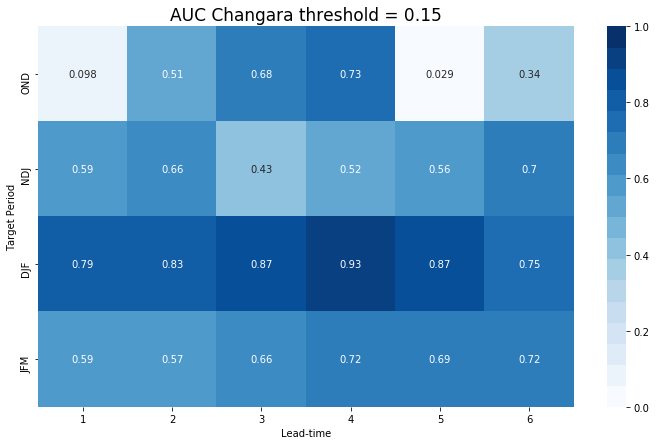

In [256]:
fig_auc, ax1 = plt.subplots(1, 1, figsize = (12, 7))
ax1 = sns.heatmap(auc_changara_15, vmin = 0, vmax = 1, cmap = cmaplist15, xticklabels = leadtimes, yticklabels = periods, annot = True)
ax1.set_title('AUC Changara threshold = 0.15', size = 17)
ax1.set_xlabel('Lead-time')
ax1.set_ylabel('Target Period')

colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.linspace(0, 1, 26))

#fig_auc.savefig('AUCchangara_15.pdf', dpi = 300)

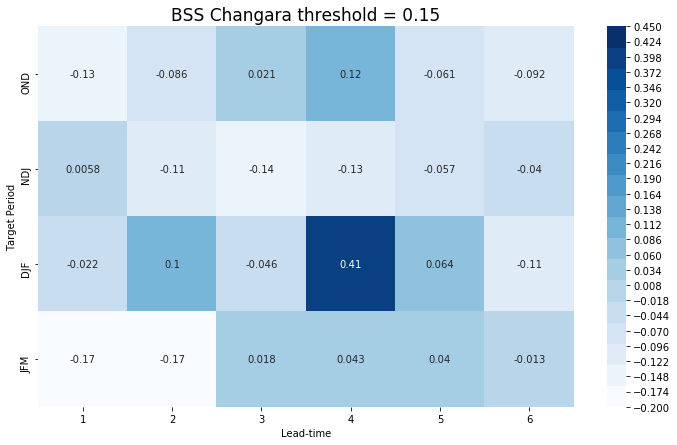

In [265]:
fig_bss, ax = plt.subplots(1, 1, figsize = (12, 7))
ax = sns.heatmap(bss_changara_15, vmin = -0.2, vmax = 0.45, cmap = cmaplist, linewidth = 0, xticklabels = leadtimes, yticklabels = periods, annot = True)
ax.set_title('BSS Changara threshold = 0.15', size = 17)
ax.set_xlabel('Lead-time')
ax.set_ylabel('Target Period')

colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.linspace(-0.2, 0.45, 26))

#fig_bss.savefig('BSSchangara_15.pdf', dpi = 300)

### threshold = 0.33

In [ ]:
fig_auc, ax1 = plt.subplots(1, 1, figsize = (12, 7))
ax1 = sns.heatmap(auc_changara_15, vmin = 0, vmax = 1, cmap = cmaplist, xticklabels = leadtimes, yticklabels = periods, annot = True)
ax1.set_title('AUC Changara threshold = 0.15', size = 17)
ax1.set_xlabel('Lead-time')
ax1.set_ylabel('Target Period')

colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.linspace(0, 1, 26))

#fig_auc.savefig('AUCchangara_15.pdf', dpi = 300)

In [ ]:
fig_bss, ax = plt.subplots(1, 1, figsize = (12, 7))
ax = sns.heatmap(bss_changara_15, vmin = -0.2, vmax = 0.45, cmap = cmaplist, linewidth = 0, xticklabels = leadtimes, yticklabels = periods, annot = True)
ax.set_title('BSS Changara threshold = 0.15', size = 17)
ax.set_xlabel('Lead-time')
ax.set_ylabel('Target Period')

colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.linspace(-0.2, 0.45, 26))

#fig_bss.savefig('BSSchangara_15.pdf', dpi = 300)

In [20]:
auc = {'OND':auc_changara[0], 'NDJ':auc_changara[1], 'DJF':auc_changara[2], 'JFM':auc_changara[3]}

In [21]:
bss = {'OND':bss_changara[0], 'NDJ':bss_changara[1], 'DJF':bss_changara[2], 'JFM':bss_changara[3]}

In [22]:
auc, bss

({'OND': array([0.66208791, 0.59340659, 0.64835165, 0.60989011, 0.75549451,
         0.66483516]),
  'NDJ': array([0.66568047, 0.83727811, 0.71893491, 0.67751479, 0.57692308,
         0.73076923]),
  'DJF': array([0.70710059, 0.73668639, 0.73076923, 0.68047337, 0.60946746,
         0.5887574 ]),
  'JFM': array([0.63017751, 0.69822485, 0.60946746, 0.70710059, 0.65680473,
         0.71893491])},
 {'OND': array([ 0.07867348, -0.0169593 ,  0.04602479, -0.03696171,  0.22388225,
          0.05131338]),
  'NDJ': array([ 0.12172469,  0.31879335,  0.02499731,  0.01796089, -0.18075144,
          0.12821608]),
  'DJF': array([-0.01591526,  0.07921585,  0.1641704 ,  0.05587007,  0.01234371,
         -0.06211952]),
  'JFM': array([ 0.02419317, -0.03169332, -0.03548119,  0.11402575,  0.09013745,
          0.20886092])})